## Desenvolvimento

Importando a base de dados embaralhada (se shuffle fosse False o kFold teria um desempenho muito ruim), salvando em faces_data as 400 imagens, uma em cada linha, com 4096 features (o faces[\'data\'] já contém o reshape das imagens 64x64 para 4096). Por último, salvo o target em faces_targets.

In [1]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces(shuffle=True)
faces_data = faces['data']
print(faces_data.shape)
faces_targets = faces.target

(400, 4096)


Importando tudo que vou precisar mais adiante.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

Alterando os parâmetros porque se seguisse o padrão a matriz ficaria muito pequena e não daria para ver direito.

Criando um vetor com valores de 0 a 39 para servir como nomes das classes na matriz.

Criando a função plot_confusion_matrix que recebe uma matriz de confusão como parâmetro obrigatório e tem a cor do mapa de cores como parâmetro opcional. A função retorna a matriz de confusão com escala de cinza.

In [3]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
params = {'figure.figsize': [12, 8], 
          'axes.labelsize': 12,
          'axes.titlesize':10, 
          'font.size': 6,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

#class_names = []
#for i in range(40):
#    class_names.append(i+1)

def plot_confusion_matrix(cm, cmap=plt.cm.Greys):

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           #xticklabels=class_names, yticklabels=class_names,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '1'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Divide os dados em 75% treino e 25% teste, treina uma perceptron multi camadas (50), então imprime a acurácia e a matriz de confusão.

Nesse split o conjunto de teste não teve nenhuma amostra das classes 22, 27 e 35, por isso a vigésima segunda linha/coluna da matriz na verdade correspondem à classe 23, a vigésima sexta à 28, etc.

0.71
[ 0  0 13 24 31 33  9 10  9  2  2 17 24 36 33 29 22 36  0 11  7 14  5  8
  9  6 32 15 23  4 36  3  4 22 32 29 11 37 18  7 31  8 14  0  1 23 20 31
  3  5 27 27  8  5 39 36 21 18 19 30 25 19 18  7  1 28 30  3  7 18  5 29
 31 29  8 38 16  1 28 39 35 37 11 20  1 36 38 25 12  6 21  7  5 35 34  2
  5 15  7 12]
[ 9  0 13 24  1 33  9 10  9 36  2 17 24 36 33 29 22 36 37 11  7 20 30  8
  8  6 32 15 23  4 36  2  4 22 32 29 16 37 18  7 31  8 38 37  1 23 28  1
 18  0 27 27 39  5 39 36 21 18 28 30 27 28 18 38  1 28 30  3  7 18  5 29
 18 29  8 38 27  1 28 39 35 37 11 20  1 36 38 13 12 35 21  7 30 35  8 37
  5 15 39 22]


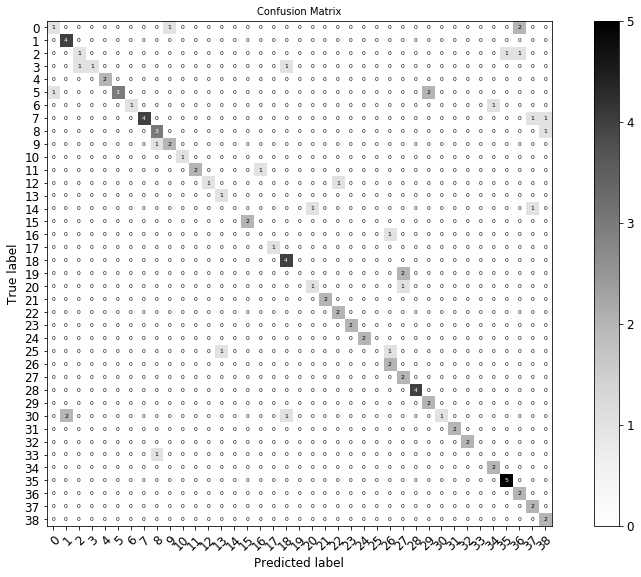

In [4]:
x_train, x_test, y_train, y_test = train_test_split(faces_data, faces_targets, test_size=0.25)
ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50))
ANN.fit(x_train, y_train)
y_pred = ANN.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(y_test)
print(y_pred)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))

plt.show()

Primeiramente fazendo o kFold com 10 divisões e criando uma lista para guardar a acurácia de cada iteração.

O laço faz 10 vezes o treinamento usando perceptron de 50 camadas, guarda as acurácias na lista e imprime a acurácia e a matriz de confusão de cada iteração.

Tentei um jeito de somar as matrizes e tirar a média, mas como nas 10 divisões os conjuntos de teste tinham classes diferentes (por exemplo na primeira iteração ele tinha 27 classes, na segunda 29, sendo que essas classes podem nem ser as mesmas então acabaria somando coisas diferentes) essa tentativa não deu certo e optei por apenas imprimir as dez matrizes diferentes.

Iteração = 1 
Accuracy Score = 0.85


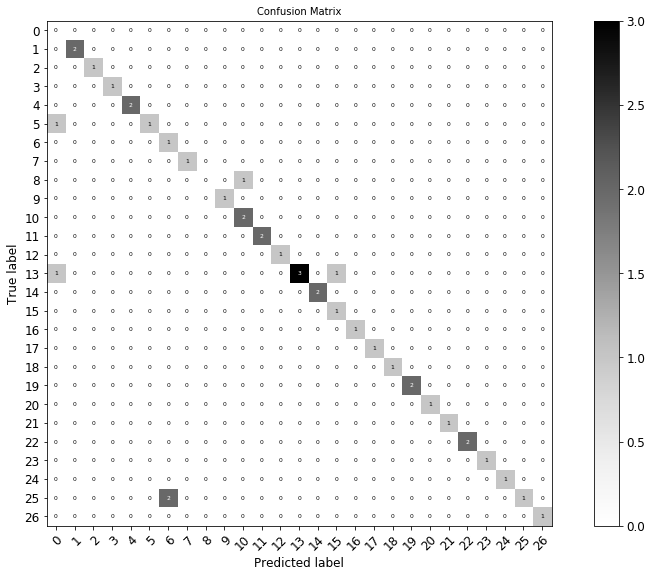

Iteração = 2 
Accuracy Score = 0.875


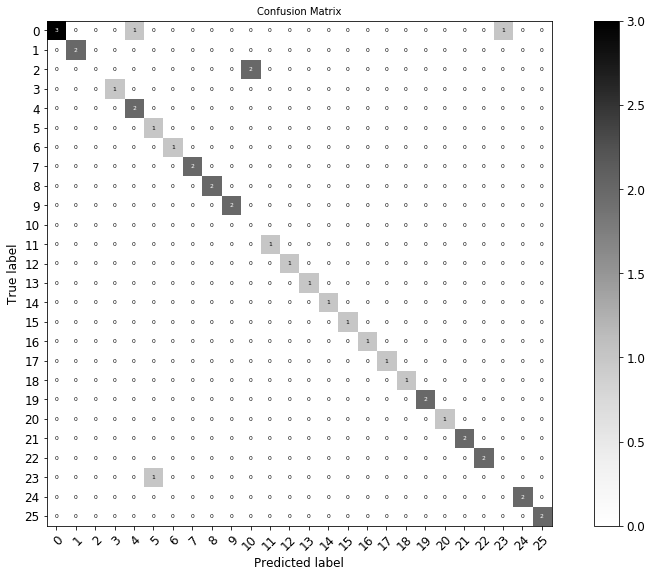

Iteração = 3 
Accuracy Score = 0.825


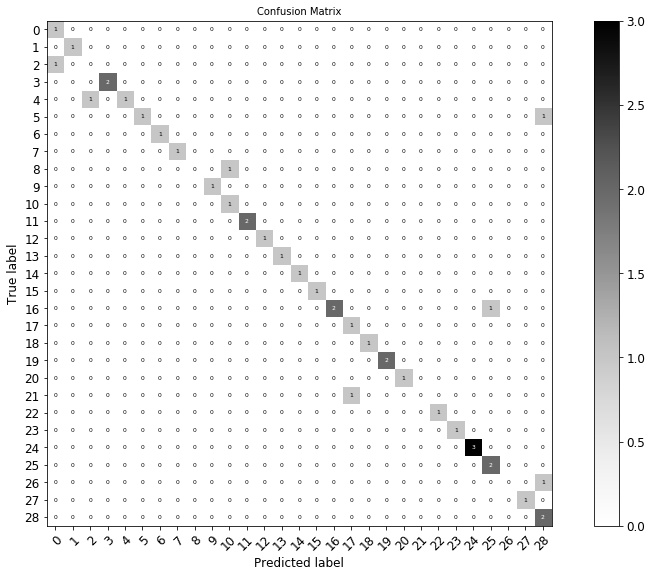

Iteração = 4 
Accuracy Score = 0.925


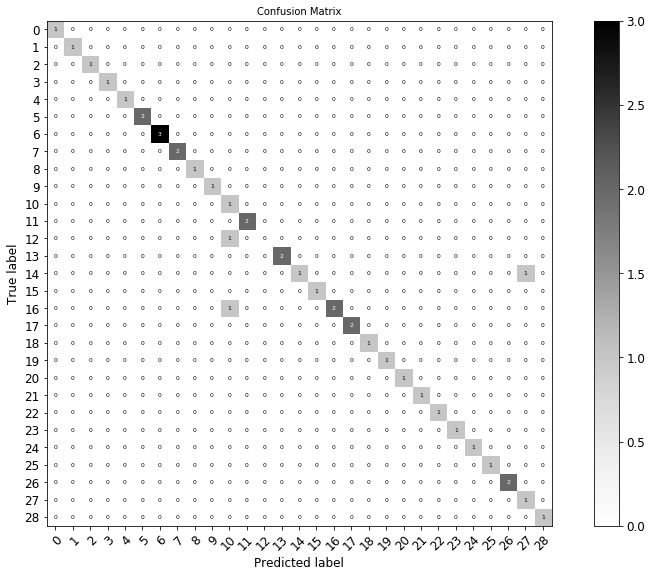

Iteração = 5 
Accuracy Score = 0.825


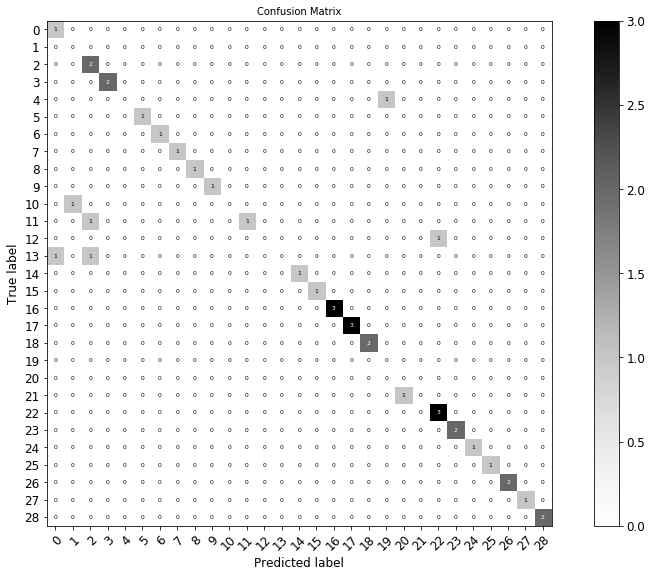

Iteração = 6 
Accuracy Score = 0.9


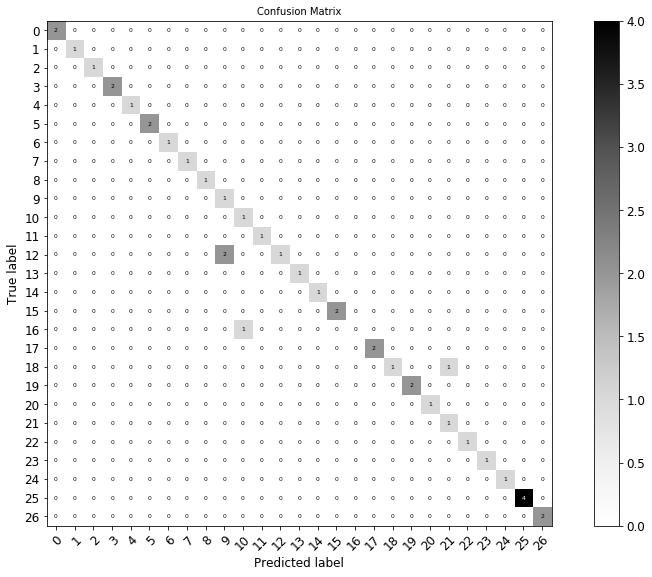

Iteração = 7 
Accuracy Score = 0.925


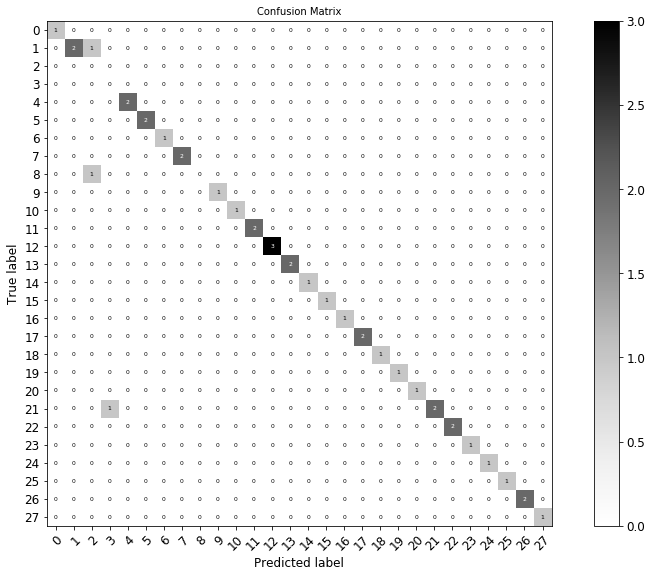

Iteração = 8 
Accuracy Score = 0.775


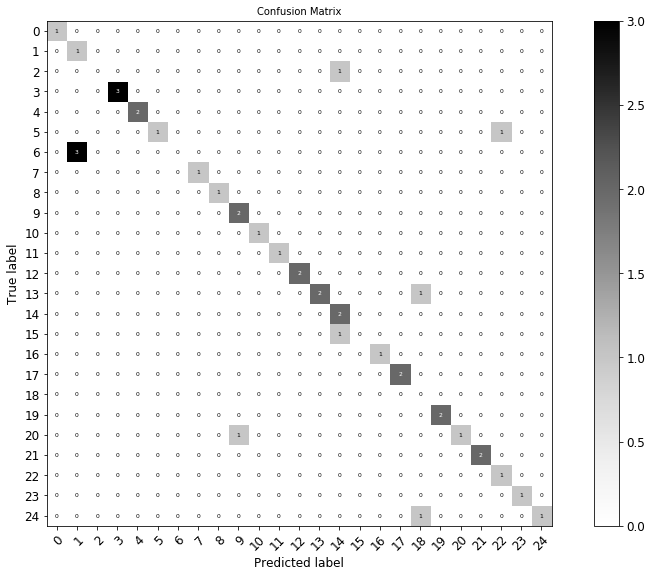

Iteração = 9 
Accuracy Score = 0.65


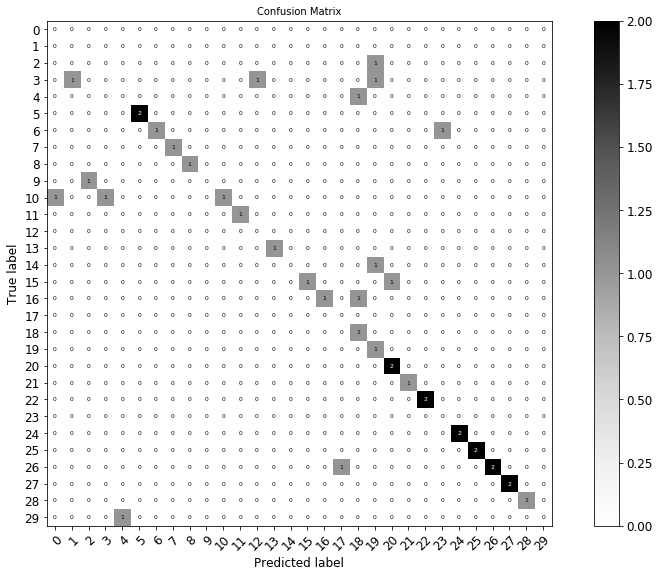

Iteração = 10 
Accuracy Score = 0.75


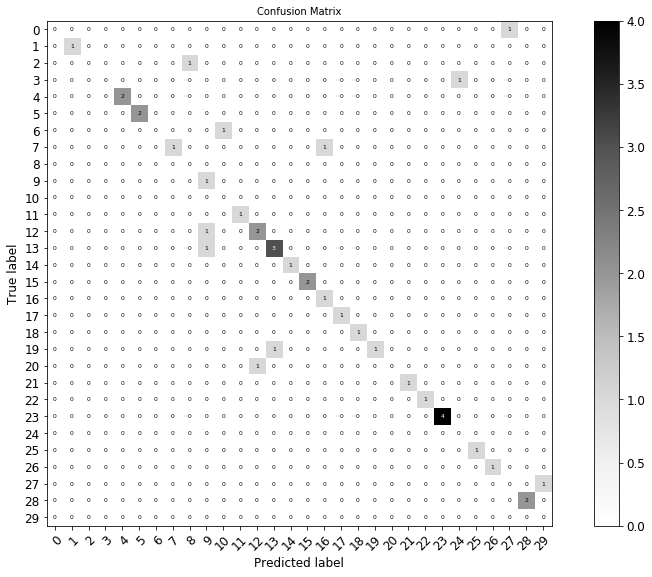

In [5]:
kf = KFold(n_splits=10)
y_pred_kf = []

i = 1
#cm_sum = np.zeros((40, 40))
#cm_med = np.zeros((40, 40))

for train_index, test_index in kf.split(faces_data):
    x_train, x_test = faces_data[train_index], faces_data[test_index]
    y_train, y_test = faces_targets[train_index], faces_targets[test_index]
    ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50))
    ANN.fit(x_train, y_train)
    y_pred = ANN.predict(x_test)
    ac = accuracy_score(y_test, y_pred)
    y_pred_kf.append(ac)
    print("Iteração =", i, "\nAccuracy Score =", ac)
    i = i+1
    cm = confusion_matrix(y_test, y_pred)
#    for i in range(len(cm)):    
#        for j in range(len(cm[0])): 
#            cm_sum[i][j] = cm_sum[i][j] + cm[i][j]
    plot_confusion_matrix(cm)
    plt.show()
    
#for i in range(len(cm_sum)):
#    for j in range(len(cm_sum[0])):
#        cm_med[i][j] = cm_sum[i][j]/10
#plot_confusion_matrix(cm_med)

Imprimindo a acurácia de cada iteração e a acurácia média com precisão de 3 casas decimais.

In [6]:
print(y_pred_kf)
print("Acurácia média:",round(np.median(y_pred_kf),3))

[0.85, 0.875, 0.825, 0.925, 0.825, 0.9, 0.925, 0.775, 0.65, 0.75]
Acurácia média: 0.837


Faz a validação cruzada com n=10 e imprime a acurácia de cada iteração, então imprime a média.

In [7]:
from sklearn.model_selection import cross_val_score
ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50))

cv = cross_val_score(ANN, faces_data, faces_targets, cv=10)
print(cv)
print(round(np.median(cv),3))

[0.85  0.725 0.9   0.875 0.775 0.875 0.775 0.85  0.8   0.775]
0.825


## Referências

[Scikit-Learn - Datasets - Olivetti Faces](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)